Korišćenjem fazi logike odrediti brzinu kojom bi automobil trebalo da ide na osnovu uslova za vožnju - temperature i oblačnosti.

Temperatura se meri u stepenima Celzijusa, oblačnost u procentima, a brzina u kilometrima na čas.

Odrediti brzinu ako je danas 16$^\circ$C i oblačnost je 81%.

In [10]:
class FuzzyInput():
    
    def __init__(self, name, xs, ys, x0):
        self.name = name
        self.points = list(zip(xs, ys)) #lista torki, prva koor je x a druga y 
        self.mu = self.calcMu(x0)
        
    def calcMu(self, x0):
        # POCETAK STUDENTSKOG KODA
        if x0 <= self.points[0][0]:
            return self.points[0][1]
        if x0 >= self.points[-1][0]:
            return self.points[-1][1]
        for i in range(len(self.points) - 1):
            x1 = self.points[i][0]
            x2 = self.points[i+1][0]
            if x0 >= x1 and x0 < x2:
                y1 = self.points[i][1]
                y2 = self.points[i+1][1]
                if y1 == y2:
                    return y2
                elif y1 < y2:
                    return (x0 - x1) / (x2 - x1)
                else:
                    return (x2 - x0) / (x2 - x1)
        return None
        # KRAJ STUDENTSKOG KODA

In [11]:
class FuzzyOutput():
    
    def __init__(self, name, xs, ys):
        self.name = name
        self.points = list(zip(xs, ys))
        self.mu = 0
        # POCETAK STUDENTSKOG KODA
        self.c = 0
        n = 0
        for point in self.points:
            if point[1] == 1:
                self.c += point[0]
                n+=1
        self.c /= n
        # KRAJ STUDENTSKOG KODA

In [12]:
from enum import Enum, unique

@unique
class LogicOp(Enum):
    AND = 0
    OR = 1

class Rule():
    
    def __init__(self, input1, input2, output, operator):
        self.input1 = input1
        self.input2 = input2
        self.output = output
        # POCETAK STUDENTSKOG KODA
        if operator == LogicOp.AND:
            self.output.mu = max(self.output.mu, min(self.input1.mu, self.input2.mu))
        else:
            self.output.mu = max(self.output.mu, max(self.input1.mu, self.input2.mu))
        # KRAJ STUDENTSKOG KODA

Ulazne promenljive:
- temperatura - hladno, umereno, toplo
- oblačnost - mala, srednja, velika

Izlazna promenljiva:
- brzina vožnje - sporo, srednje, brzo

In [13]:
from matplotlib import pyplot as plt

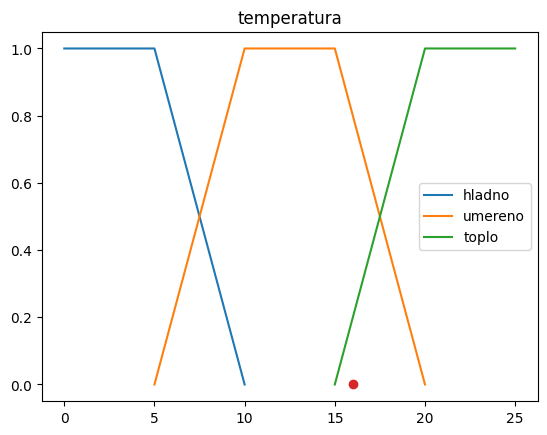

In [14]:
plt.plot([0,5,10],[1,1,0])
plt.plot([5,10,15,20],[0,1,1,0])
plt.plot([15,20,25],[0,1,1])
plt.title('temperatura')
plt.legend(['hladno', 'umereno', 'toplo'])
plt.plot([16],[0],'o')
plt.show()

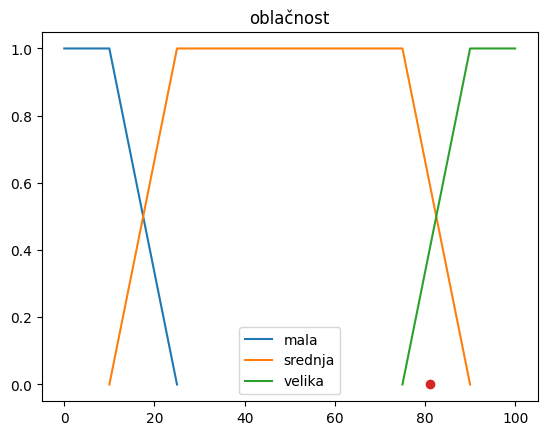

In [15]:
plt.plot([0,10,25],[1,1,0])
plt.plot([10,25,75,90],[0,1,1,0])
plt.plot([75,90,100],[0,1,1])
plt.title('oblačnost')
plt.legend(['mala', 'srednja', 'velika'])
plt.plot([81],[0],'o')
plt.show()

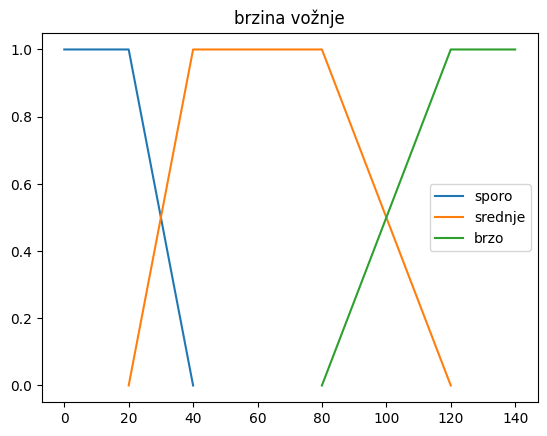

In [16]:
plt.plot([0,20,40],[1,1,0])
plt.plot([20,40,80,120],[0,1,1,0])
plt.plot([80,120,140],[0,1,1])
plt.title('brzina vožnje')
plt.legend(['sporo', 'srednje', 'brzo'])
plt.show()

Pravila:
- ako je toplo i mala oblačnost, onda se vozi brzo
- ako je hladno ili velika oblačnost, onda se vozi sporo
- ako je hladno i srednja oblačnost, onda se vozi srednje

In [17]:
temperatura = []
temperatura.append(FuzzyInput("hladno", [5, 10], [1,0], 16))
temperatura.append(FuzzyInput("umereno", [5, 10, 15, 20], [0,1,1,0], 16))
temperatura.append(FuzzyInput("toplo", [15, 20], [0,1], 16))

oblacnost = []
oblacnost.append(FuzzyInput("mala", [10, 25], [1,0], 81))
oblacnost.append(FuzzyInput("srednja", [10, 25, 75, 90], [0,1,1,0], 81))
oblacnost.append(FuzzyInput("velika", [75, 90], [0,1], 81))

brzina = []
brzina.append(FuzzyOutput("sporo", [20, 40], [1,0]))
brzina.append(FuzzyOutput("srednje", [20, 40, 80, 120], [0,1,1,0]))
brzina.append(FuzzyOutput("brzo", [80, 120], [0,1]))

# POCETAK STUDENTSKOG KODA
pravila = []

pravila.append(Rule(temperatura[2], oblacnost[0], brzina[2], LogicOp.AND))
pravila.append(Rule(temperatura[0], oblacnost[2], brzina[0], LogicOp.OR))
pravila.append(Rule(temperatura[0], oblacnost[1], brzina[1], LogicOp.AND))

brojilac = 0
imenilac = 0
for b in brzina:
    brojilac += b.c * b.mu
    imenilac += b.mu
resenje = brojilac / imenilac
resenje
# KRAJ STUDENTSKOG KODA

20.0